In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading in the data

In [2]:
data = pd.read_csv('_28For_Candidate_29_dspm_case_data_set_-__28For_Candidate_29_dspm_case_data_set.csv')
data.head()

,userId,sessionReferrer,browser,deviceType,estimatedAnnualIncome,estimatedPropertyType,visitCount,pageURL,ctaCopy,ctaPlacement,editorialSnippet,scrolledPage,scrollDepth,clickedCTA,scheduledAppointment,revenue,mortgageVariation
0,user_97048,Google,Safari,Mobile,152000,Apartment,1,https://www.financialservices.com/mortgages/ty...,First Time? We've Made it Easy to Find the Bes...,Middle,"Understand the pros and cons of fixed-rate, ad...",1,75,0,0,0,NaN
1,user_14393,Social,Safari,Mobile,140000,Apartment,2,https://www.financialservices.com/mortgages/ho...,Access Your Personalized Mortgage Rates Now,Bottom,Equip yourself with knowledge. Understand the ...,1,25,0,0,0,NaN
2,user_30959,Direct,Safari,Mobile,128000,House,1,https://www.financialservices.com/mortgages/fi...,Access Your Personalized Mortgage Rates Now,Bottom,Navigate the home buying journey with confiden...,1,75,0,0,0,NaN
3,user_88588,Google,Chrome,Mobile,205000,Apartment,1,https://www.financialservices.com/mortgages/re...,Get Pre-Approved for a Mortgage in 5 Minutes,Middle,Our tools help you assess whether refinancing ...,1,75,1,0,0,NaN
4,user_65965,Google,Safari,Mobile,373000,House,1,https://www.financialservices.com/mortgages/re...,Access Your Personalized Mortgage Rates Now,Top,Navigate the complexities of mortgage rates wi...,0,0,0,0,0,NaN


## Exploring the data

In [3]:
# Split up the each ctaCopy and ctaPlacement and show their counts in a histogram
print(f"Split for {data['ctaCopy'].value_counts()}\n")

print(f"Split for {data['ctaPlacement'].value_counts()}\n")

# Now show the counts for each ctaCopy and their ctaPlacement
print(f"Split for {data.groupby(['ctaCopy', 'ctaPlacement']).size()}")


Split for ctaCopy
Get Pre-Approved for a Mortgage in 5 Minutes                     33334
First Time? We've Made it Easy to Find the Best Mortgage Rate    33333
Access Your Personalized Mortgage Rates Now                      33333
Name: count, dtype: int64

Split for ctaPlacement
Top       33334
Middle    33333
Bottom    33333
Name: count, dtype: int64

Split for ctaCopy                                                        ctaPlacement
Access Your Personalized Mortgage Rates Now                    Bottom          11111
                                                               Middle          11111
                                                               Top             11111
First Time? We've Made it Easy to Find the Best Mortgage Rate  Bottom          11111
                                                               Middle          11111
                                                               Top             11111
Get Pre-Approved for a Mortgage in 5 Minutes    

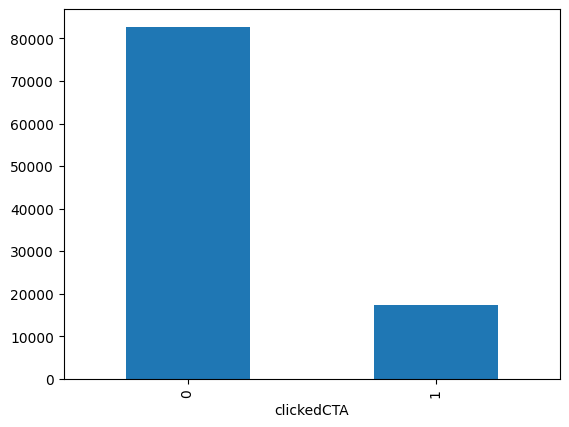

In [4]:
# Show the number of users who clickedCTA and the number of users who did not clickedCTA in a histogram
data['clickedCTA'].value_counts().plot(kind='bar')
plt.show()

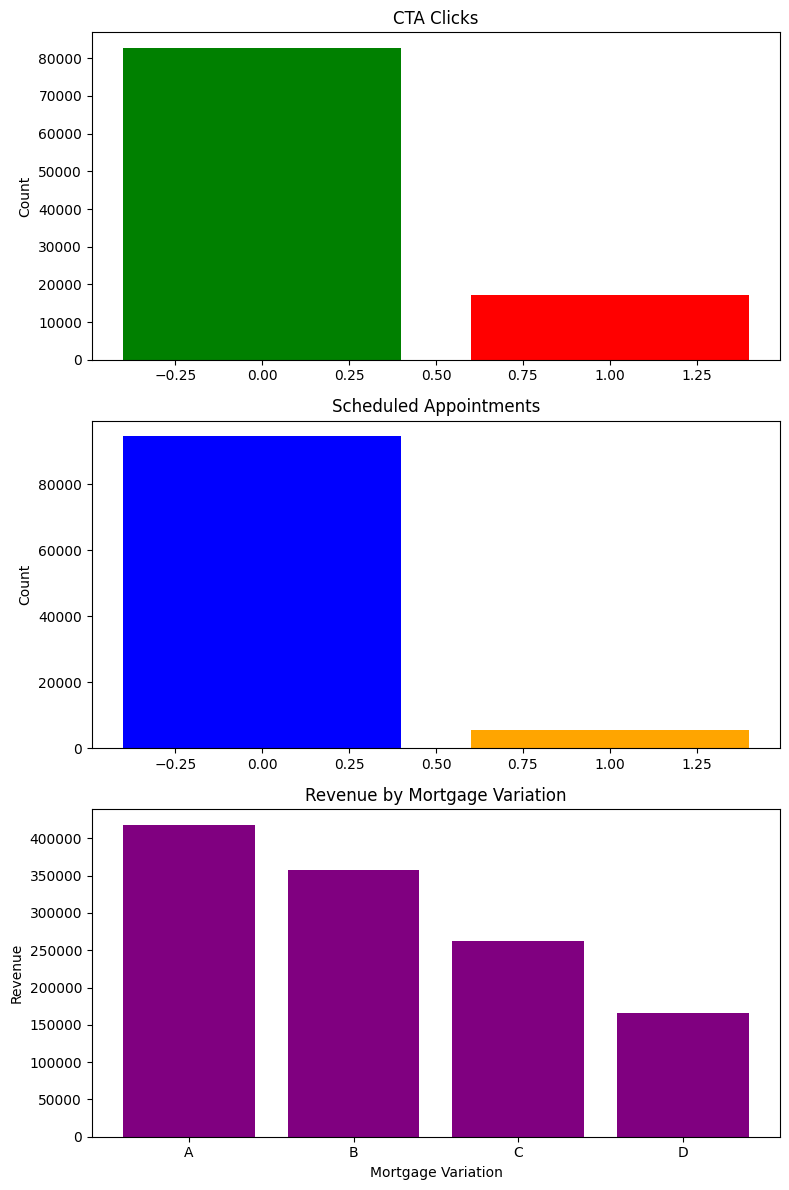

In [5]:
# Count occurrences for 'clickedCTA' and 'scheduledAppointment'
cta_clicks = data['clickedCTA'].value_counts()
appointments = data['scheduledAppointment'].value_counts()

# Group by 'mortgageVariation' and sum the revenue
mortgage_revenue = data.groupby('mortgageVariation')['revenue'].sum()

# Create a bar graph for clicks and appointments
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=False)

# Bar graph for Clicked CTA
axes[0].bar(cta_clicks.index, cta_clicks.values, color=['green', 'red'])
axes[0].set_title("CTA Clicks")
axes[0].set_ylabel("Count")

# Bar graph for Scheduled Appointments
axes[1].bar(appointments.index, appointments.values, color=['blue', 'orange'])
axes[1].set_title("Scheduled Appointments")
axes[1].set_ylabel("Count")

# Bar graph for Revenue by Mortgage Variation
axes[2].bar(mortgage_revenue.index.fillna("No Appointment"), mortgage_revenue.values, color='purple')
axes[2].set_title("Revenue by Mortgage Variation")
axes[2].set_ylabel("Revenue")
axes[2].set_xlabel("Mortgage Variation")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Viewing the clickedCTA statistics

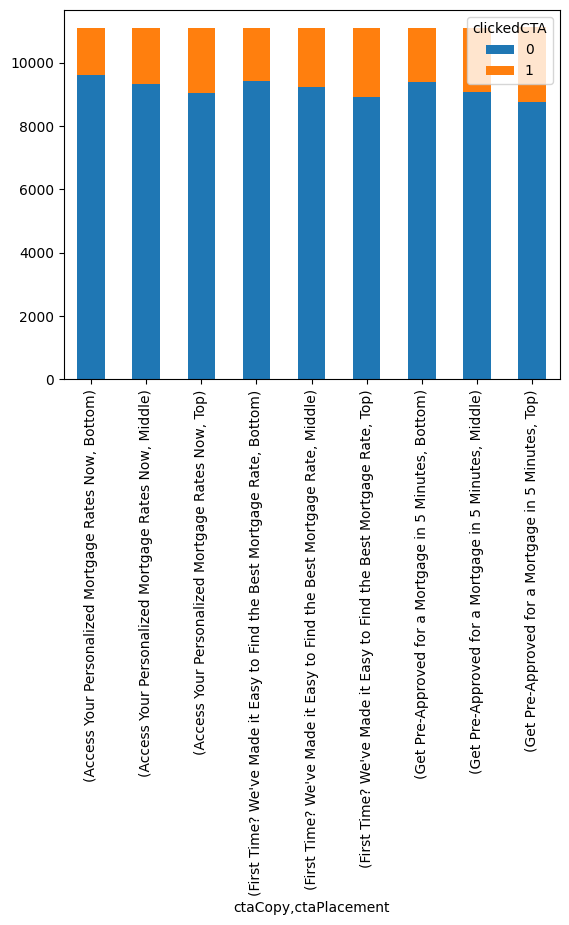

In [6]:
# Now I want to see the clickedCTA based on the ctaCopy and their ctaPlacement
data.groupby(['ctaCopy', 'ctaPlacement', 'clickedCTA']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

In [7]:
# Now get the max clickedCTA == 1 for the ctaCopy and ctaPlacement
print(f"Split for \n\n{data.groupby(['ctaCopy', 'ctaPlacement']).clickedCTA.sum()}")

Split for 

ctaCopy                                                        ctaPlacement
Access Your Personalized Mortgage Rates Now                    Bottom          1498
                                                               Middle          1794
                                                               Top             2072
First Time? We've Made it Easy to Find the Best Mortgage Rate  Bottom          1701
                                                               Middle          1888
                                                               Top             2205
Get Pre-Approved for a Mortgage in 5 Minutes                   Bottom          1713
                                                               Middle          2037
                                                               Top             2353
Name: clickedCTA, dtype: int64


In [8]:
## Show the best vs the worst performing for above
print(f"Split for \n\n{data.groupby(['ctaCopy', 'ctaPlacement']).revenue.sum().sort_values(ascending=False)}")
print(f"Split for \n\n{data.groupby(['ctaCopy', 'ctaPlacement']).clickedCTA.sum().sort_values(ascending=False)}")

Split for 

ctaCopy                                                        ctaPlacement
First Time? We've Made it Easy to Find the Best Mortgage Rate  Bottom          143390
Get Pre-Approved for a Mortgage in 5 Minutes                   Top             140910
First Time? We've Made it Easy to Find the Best Mortgage Rate  Top             136520
Access Your Personalized Mortgage Rates Now                    Top             134675
First Time? We've Made it Easy to Find the Best Mortgage Rate  Middle          134125
Get Pre-Approved for a Mortgage in 5 Minutes                   Middle          130595
                                                               Bottom          129970
Access Your Personalized Mortgage Rates Now                    Middle          126935
                                                               Bottom          125915
Name: revenue, dtype: int64
Split for 

ctaCopy                                                        ctaPlacement
Get Pre-Approved for a

# Determine the best

Based on the revenue and clickedCTA values, I think the CTA champion should be the best performing revenue wise. Ultimately, revenue is the driving metric as it
brings in the profit to the business. Although there is a disparity of ~600 clicks between the best earner and the best clicker, the best earner is more important. 

In [9]:
print(f"CTA Champion: {data.groupby(['ctaCopy', 'ctaPlacement']).revenue.sum().sort_values(ascending=False).head(1)}")

CTA Champion: ctaCopy                                                        ctaPlacement
First Time? We've Made it Easy to Find the Best Mortgage Rate  Bottom          143390
Name: revenue, dtype: int64


In [10]:
# Group by 'ctaCopy' and 'ctaPlacement', then calculate the sum for revenue and clicks
grouped_data = data.groupby(['ctaCopy', 'ctaPlacement']).agg({'revenue': 'sum', 'clickedCTA': 'sum'})

# Sort to identify the top-performing CTA based on revenue
cta_champion = grouped_data.sort_values('revenue', ascending=False).head(1)

# Total revenue and clicks from all CTAs
total_revenue = grouped_data['revenue'].sum() - cta_champion['revenue'].iloc[0]
total_clicks = grouped_data['clickedCTA'].sum() - cta_champion['clickedCTA'].iloc[0]

# Calculate the percentage contribution of the champion CTA (revenue and clicks)
champion_revenue_percentage = (cta_champion['revenue'].iloc[0] / total_revenue) * 100
champion_clicks_percentage = (cta_champion['clickedCTA'].iloc[0] / total_clicks) * 100

# Calculate the average revenue and clicks of all other CTAs
average_revenue_others = cta_champion['revenue'].iloc[0] - (total_revenue / (len(grouped_data) - 1))
average_clicks_others = cta_champion['clickedCTA'].iloc[0] - (total_clicks / (len(grouped_data) - 1))

print(f"Champion Revenue Contribution: {champion_revenue_percentage:.2f}%")
print(f"Champion Clicks Contribution: {champion_clicks_percentage:.2f}%")
print(f"Average Revenue of Other CTAs: ${average_revenue_others:.2f}")
print(f"Average Clicks of Other CTAs: {average_clicks_others:.2f}")


Champion Revenue Contribution: 13.53%
Champion Clicks Contribution: 10.93%
Average Revenue of Other CTAs: $10934.38
Average Clicks of Other CTAs: -244.00


# Viewing behaviors of the users

In [11]:
high_performers = data[(data['clickedCTA'] == 1) & (data['revenue'] > data['revenue'].mean())]
print(high_performers.groupby(['sessionReferrer', 'browser'])['revenue'].mean().sort_values(ascending=False))


sessionReferrer  browser
Social           Edge       239.166667
                 Firefox    225.000000
Direct           Chrome     223.347979
Google           Safari     221.079812
Email            Edge       220.945946
                 Chrome     220.915493
                 Firefox    218.464567
Direct           Firefox    216.864407
Google           Edge       216.785714
Direct           Safari     216.602465
Google           Chrome     215.847902
Email            Safari     215.370370
Google           Firefox    212.747036
Social           Safari     210.833333
Direct           Edge       209.489796
Social           Chrome     201.081081
Name: revenue, dtype: float64


# Comparison by these
## Demograph (estimatedAnnualIncome and estimatedPropertyType)

In [12]:
# Make the income in smaller ranges
data['incomeRange'] = pd.cut(data['estimatedAnnualIncome'], bins=4, labels=['0-100k', '100k-200k', '200k-300k', '400k-500k'])

# Group by 'incomeRange' and 'estimatedPropertyType', then calculate
# the sum for revenue and clicks
grouped_income_data = data.groupby(['incomeRange', 'estimatedPropertyType']).agg({'revenue': 'sum', 'clickedCTA': 'sum'})

# Sort to identify the top-performing income range and property type
income_champion = grouped_income_data.sort_values('revenue', ascending=False).head(1)

# Total revenue and clicks from all income ranges and property types
total_revenue_income = grouped_income_data['revenue'].sum() - income_champion['revenue'].iloc[0]

# Calculate the percentage contribution of the champion income range and property type
champion_revenue_percentage_income = (income_champion['revenue'].iloc[0] / total_revenue_income) * 100

print(f"Champion Revenue Contribution: {champion_revenue_percentage_income:.2f}%")
print(income_champion)

Champion Revenue Contribution: 43.53%
                                   revenue  clickedCTA
incomeRange estimatedPropertyType                     
0-100k      Apartment               364840        5462


C:\Users\gdgue\AppData\Local\Temp\ipykernel_40948\2327953360.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_income_data = data.groupby(['incomeRange', 'estimatedPropertyType']).agg({'revenue': 'sum', 'clickedCTA': 'sum'})


## Device / browser (deviceType or brower correlates with higher revenue)

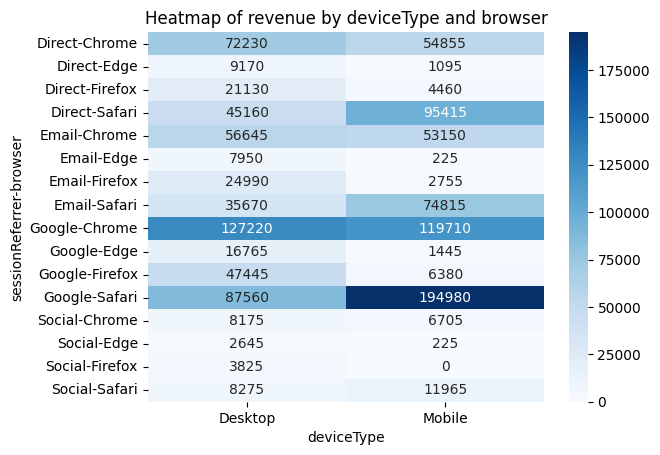

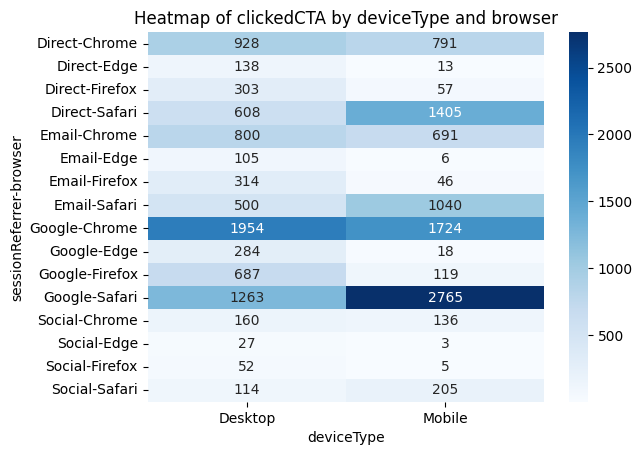

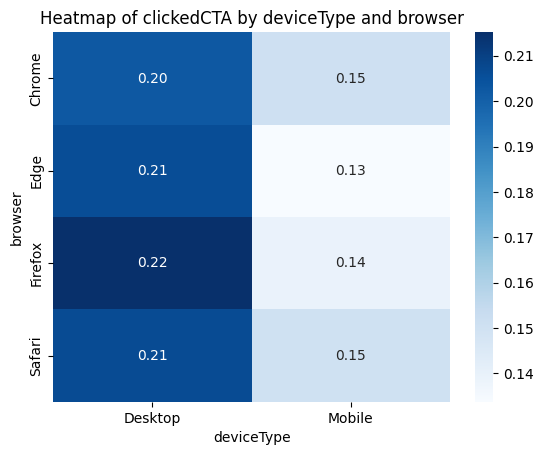

In [13]:
# Device and broser behavior
import seaborn as sns

pivot_data = data.groupby(['sessionReferrer', 'browser', 'deviceType'])['revenue'].sum().unstack()

# Heatmap visualization
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap of revenue by deviceType and browser")
plt.show()

pivot_data = data.groupby(['sessionReferrer', 'browser', 'deviceType'])['clickedCTA'].sum().unstack()

# Heatmap visualization
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="Blues")
plt.title("Heatmap of clickedCTA by deviceType and browser")
plt.show()

# Percentage of users who clickedCTA by deviceType and browser
pivot_data = data.groupby(['browser', 'deviceType'])['clickedCTA'].mean().unstack()

# Heatmap visualization
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of clickedCTA by deviceType and browser")
plt.show()

## Session behavior (visitCount scolledPage and scrollDepth)

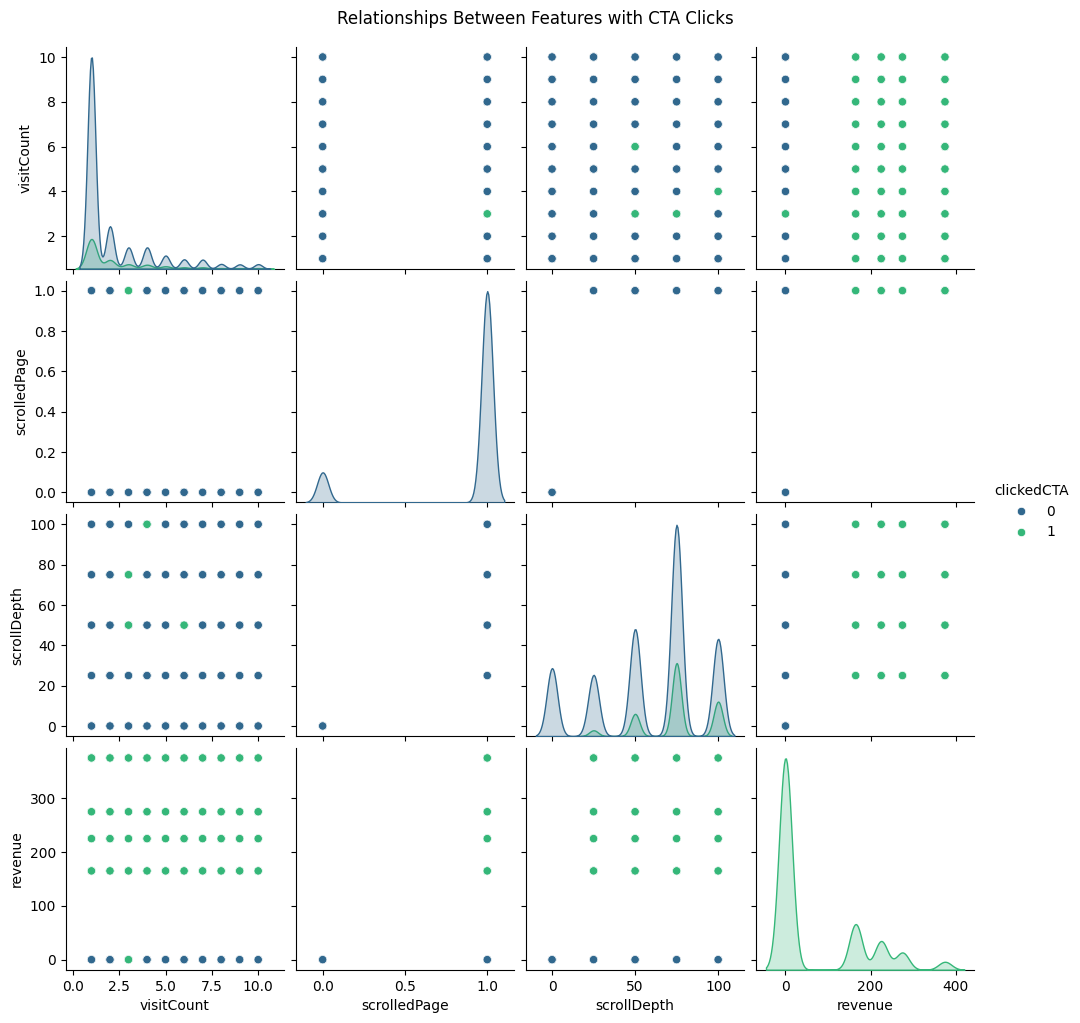

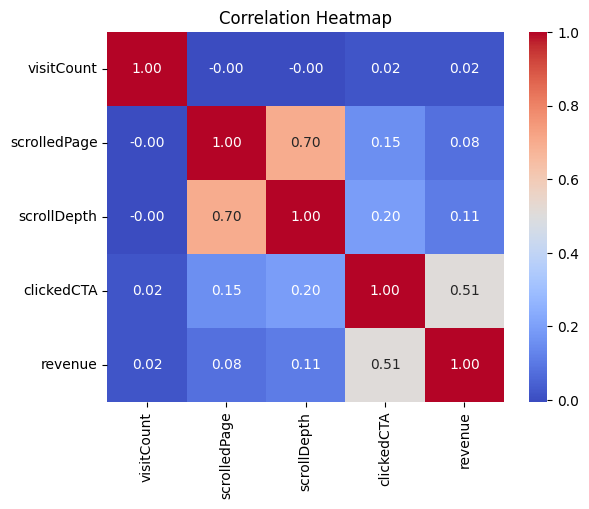

In [18]:
# Pairplot
session_behavior = data[['visitCount', 'scrolledPage', 'scrollDepth', 'clickedCTA', 'revenue']]
sns.pairplot(session_behavior, hue="clickedCTA", diag_kind="kde", palette="viridis")
plt.suptitle("Relationships Between Features with CTA Clicks", y=1.02)
plt.show()

# Heatmap of correlations
corr = session_behavior.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Visit Count: visitCount
1     0.60612
2     0.13031
3     0.06589
4     0.06451
5     0.03979
6     0.02733
7     0.02665
8     0.01380
10    0.01312
9     0.01248
Name: proportion, dtype: float64
Clicked CTA: clickedCTA
0    0.82739
1    0.17261
Name: proportion, dtype: float64
Scheduled Appointment: scheduledAppointment
0    0.94483
1    0.05517
Name: proportion, dtype: float64
Visit Count Percentage:
visitCount
1     60.612
2     13.031
3      6.589
4      6.451
5      3.979
6      2.733
7      2.665
8      1.380
10     1.312
9      1.248
Name: proportion, dtype: float64


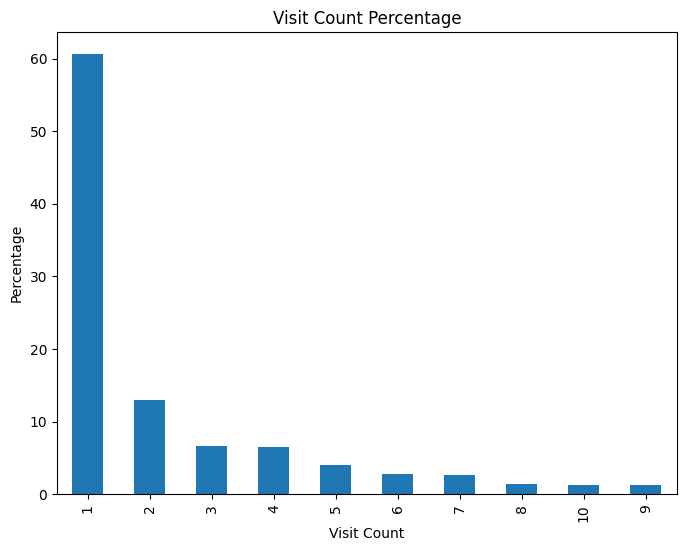


CTA Click Rate per Visit Count:
visitCount
1     15.622319
2     21.364439
3     21.733192
4     19.888389
5     19.829103
6     16.648372
7     16.998124
8     15.434783
9     14.423077
10    15.472561
Name: clickedCTA, dtype: float64


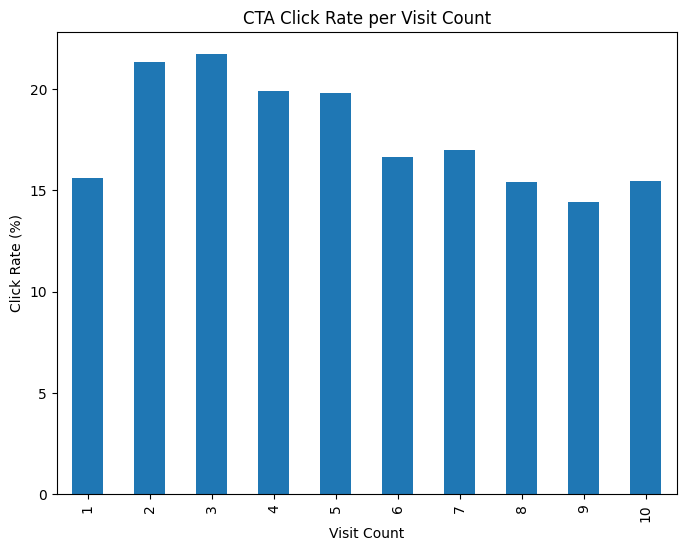

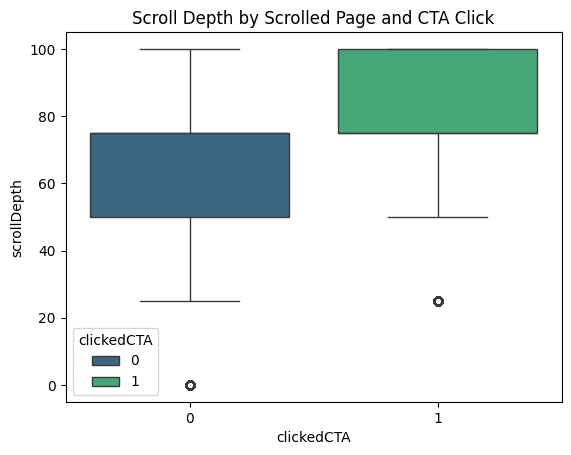

In [17]:
# Percentage of visit count to clickedCTA, clickedCTA to scheduledAppointment, and scheduledAppointment to revenue
visit_count = data['visitCount'].value_counts(normalize=True)
clicks = data['clickedCTA'].value_counts(normalize=True)
appointments = data['scheduledAppointment'].value_counts(normalize=True)

print(f"Visit Count: {visit_count}")
print(f"Clicked CTA: {clicks}")
print(f"Scheduled Appointment: {appointments}")

# Percentage distribution of visit counts
visit_count_percentage = visit_count * 100
print("Visit Count Percentage:")
print(visit_count_percentage)

# Plot Visit Count Percentage
plt.figure(figsize=(8,6))
visit_count_percentage.plot(kind='bar')
plt.title('Visit Count Percentage')
plt.xlabel('Visit Count')
plt.ylabel('Percentage')
plt.show()

# Conversion rate from Visit Count to Clicked CTA
cta_click_rate = data.groupby('visitCount')['clickedCTA'].mean() * 100
print("\nCTA Click Rate per Visit Count:")
print(cta_click_rate)

# Plot CTA Click Rate per Visit Count
plt.figure(figsize=(8,6))
cta_click_rate.plot(kind='bar')
plt.title('CTA Click Rate per Visit Count')
plt.xlabel('Visit Count')
plt.ylabel('Click Rate (%)')
plt.show()


# scrollDepth from scrolledPage compared to clicked cta
sns.boxplot(x='clickedCTA', y='scrollDepth', hue='clickedCTA', data=data, palette='viridis')
plt.title("Scroll Depth by Scrolled Page and CTA Click")
plt.show()


## Analysis when compared to CTA placement and copy